In [42]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools

from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 8)

This notebook was run on model version 4.5 (x-factor implementation)

The purpose of this notebook is to develop code to test the correlation between child wasting and child stunting exposures at initialization and 6 months later. For this version, there should be no correlation between wasting and stunting exposures because risk-risk correlation has not yet been built into the model.

- 1.0 Initialize interactive simulation 
- 1.1 Calculate odds of stunting based on wasting at initialization 
- 1.2 WHZ and HAZ propensity correlation coefficient at initialization
- 1.3 Z-score correlations at initialization

- 2.0 Run simulation for X months
- 2.1 Calculate odds of stunting based on wasting at X months
- 2.2 WHZ and HAZ propensity correlation coefficient at X months
- 2.3 Z-score correlations at X months

# 1.1 Initialize interactive simulation

In [43]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [44]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf')

In [45]:
sim = InteractiveContext(path)

2021-10-11 11:47:23.750 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2021-10-11 11:47:23.752 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2021-10-11 11:47:23.753 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2021-10-11 11:47:23.753 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
2021-10-11 11:47:24.393 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline cause_specific_mortality_rate
2021-10-11 11:47:24.395 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mortality_rate
2021-10-11 11:47:24.770 | DEBUG    | vivarium.framework.values:registe

2021-10-11 11:47:29.717 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.incidence_rate.2.risk_effect.risk_factor.child_stunting.cause.diarrheal_diseases.incidence_rate.adjust_target as modifier to diarrheal_diseases.incidence_rate
2021-10-11 11:47:29.720 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.incidence_rate.paf.2.lookup_table_42 as modifier to diarrheal_diseases.incidence_rate.paf
2021-10-11 11:47:29.919 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.2.risk_effect.risk_factor.child_stunting.cause.measles.incidence_rate.adjust_target as modifier to measles.incidence_rate
2021-10-11 11:47:29.920 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.2.lookup_table_44 as modifier to measles.incidence_rate.paf
2021-10-11 11:47:30.119 | DEBUG    | vivarium.framework.value

2021-10-11 11:47:33.490 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate.population_attributable_fraction
2021-10-11 11:47:33.491 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.4.riskstate.mild_child_wasting.adjust_mortality_rate as modifier to mortality_rate
2021-10-11 11:47:33.904 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting_to_moderate_acute_malnutrition.transition_rate
2021-10-11 11:47:33.906 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting_to_moderate_acute_malnutrition.transition_rate.paf
2021-10-11 11:47:34.007 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.remission_rate
2021-10-11 11:47:34.008 | DEBUG    | vivarium.framework.values:_regis

In [46]:
pop0 = sim.get_population()
pop0

,tracked,previous_child_wasting,previous_lower_respiratory_infections,previous_measles,previous_diarrheal_diseases,years_lived_with_disability,years_of_life_lost,cause_of_death,entrance_time,alive,...,measles,measles_event_count,measles_event_time,susceptible_to_measles_event_count,susceptible_to_measles_event_time,diarrheal_diseases,diarrheal_diseases_event_count,diarrheal_diseases_event_time,susceptible_to_diarrheal_diseases_event_time,susceptible_to_diarrheal_diseases_event_count
0,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
1,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
2,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
3,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9997,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9998,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0
9999,True,,,,,0.0,0.0,not_dead,2021-12-31 12:00:00,alive,...,susceptible_to_measles,0,NaT,0,NaT,susceptible_to_diarrheal_diseases,0,NaT,NaT,0


In [47]:
cgf = pd.concat([pop0.loc[:, ['age', 'sex', 'child_wasting']], 
           sim.get_value('child_stunting.exposure')(pop0.index),
           sim.get_value('child_stunting.propensity')(pop0.index)], axis=1)
cgf

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399
...,...,...,...,...,...
9996,3.859252,Female,moderate_acute_malnutrition,cat4,0.805273
9997,0.070874,Female,mild_child_wasting,cat4,0.809186
9998,4.425916,Female,susceptible_to_child_wasting,cat3,0.539346
9999,4.304582,Male,susceptible_to_child_wasting,cat4,0.651469


# 1.2. Calculate odds of stunting based on wasting at initialization

This is used for external validation. See reference in:
https://vivarium-research.readthedocs.io/en/latest/gbd2019_models/risk_risk_correlation/wasting_and_stunting/index.html

In [58]:
cgf['wasted'] = np.where(cgf.child_wasting.str.contains('acute_malnutrition'), True, False)
cgf['stunted'] = np.where(cgf['risk_factor.child_stunting_exposure'].isin(['cat1','cat2']), True, False)
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True


In [59]:
def calculate_OR_of_stunting_among_wasted(data, age_start, age_end):
    data_sub = data.loc[data.age<age_end].loc[data.age>age_start]

    wasted_odds = (len(data_sub.loc[data_sub.wasted==True].loc[data_sub.stunted==True]) 
                   / len(data_sub.loc[data_sub.wasted==True].loc[data_sub.stunted==False]))
    not_wasted_odds = (len(data_sub.loc[data_sub.wasted==False].loc[data_sub.stunted==True]) 
                       / len(data_sub.loc[data_sub.wasted==False].loc[data_sub.stunted==False]))
    return wasted_odds / not_wasted_odds

In [60]:
calculate_OR_of_stunting_among_wasted(cgf, 28/365, 0.5)

0.977233676975945

In [61]:
calculate_OR_of_stunting_among_wasted(cgf, 0.5, 1)

1.0927188940092165

In [62]:
calculate_OR_of_stunting_among_wasted(cgf, 1, 2)

1.5824015556635878

In [63]:
calculate_OR_of_stunting_among_wasted(cgf, 2, 5)

0.8082847793119963

In [64]:
calculate_OR_of_stunting_among_wasted(cgf, 0.5, 5)

0.9559114925213219

# 1.3. WHZ and HAZ propensity correlation coefficient at initialization

NOTE: there is currently no child wasting initialization propensity in the state table or the pipelines. We will need this in order to calculate the correlation coefficients. Currently, I assigned a random propensity based on each simulant's wasting exposure state.

In [15]:
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True


In [16]:
cgf['age_group'] = np.where(cgf.age<6/365,'early_neonatal',
                           np.where(cgf.age<28/365,'post_neonatal',
                                   np.where(cgf.age<0.5,'1_to_5_months',
                                           np.where(cgf.age<1, '6_to_11_months',
                                                   np.where(cgf.age<2,'1_to_2_years','2_to_5_years')))))
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years
4,0.797290,Male,mild_child_wasting,cat1,0.010056,False,True,6_to_11_months


In [17]:
pcts = pd.crosstab(index=cgf['age_group'], columns=cgf['child_wasting'], normalize='index').reset_index()#.drop(columns='child_wasting')
pcts

child_wasting,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,1_to_2_years,0.209109,0.087169,0.016650,0.687071
1,1_to_5_months,0.194079,0.096491,0.032895,0.676535
2,2_to_5_years,0.211179,0.069147,0.011893,0.707781
3,6_to_11_months,0.222904,0.102249,0.019427,0.655419
4,early_neonatal,0.139535,0.093023,0.069767,0.697674
5,post_neonatal,0.187050,0.079137,0.028777,0.705036


In [18]:
cgf = cgf.merge(pcts, on='age_group')
cgf

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.016200,Male,susceptible_to_child_wasting,cat4,0.246416,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9997,0.013505,Male,susceptible_to_child_wasting,cat4,0.748483,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9998,0.012292,Female,susceptible_to_child_wasting,cat4,0.971857,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674
9999,0.012934,Male,mild_child_wasting,cat4,0.059126,False,False,early_neonatal,0.139535,0.093023,0.069767,0.697674


In [19]:
# for now, apply a dummy propensity based on child wasting exposure category
import random

# apply propensities
cgf['child_wasting_propensity'] = np.nan
for i in cgf.index:
    if cgf.child_wasting[i]=='severe_acute_malnutrition':
        cgf['child_wasting_propensity'][i] = random.uniform(0,cgf['severe_acute_malnutrition'][i])
    elif cgf.child_wasting[i]=='moderate_acute_malnutrition':
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i], 
                                                            cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i])
    elif cgf.child_wasting[i]=='mild_child_wasting':
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i], 
                                                            cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i]+cgf['mild_child_wasting'][i])
    else: 
        cgf['child_wasting_propensity'][i] = random.uniform(cgf['severe_acute_malnutrition'][i]+cgf['moderate_acute_malnutrition'][i]+cgf['mild_child_wasting'][i], 
                                                            1)
cgf.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.066625
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.323165
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.802019
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.663774
4,4.285787,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.600913


Text(0.5, 1.0, 'Child growth failure propensities at initialization: All ages')

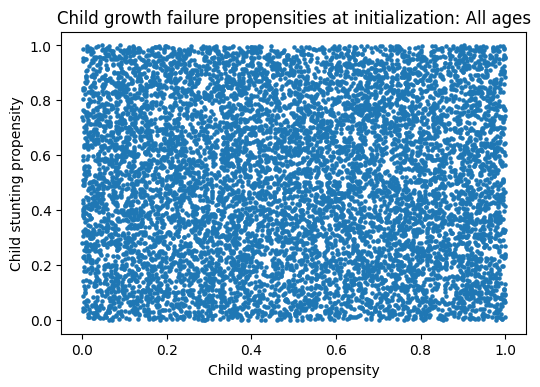

In [20]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.scatter(cgf.child_wasting_propensity, cgf.child_stunting_propensity, s=5)
plt.xlabel('Child wasting propensity')
plt.ylabel('Child stunting propensity')
plt.title('Child growth failure propensities at initialization: All ages')

<AxesSubplot:xlabel='child_wasting_propensity', ylabel='child_stunting_propensity'>

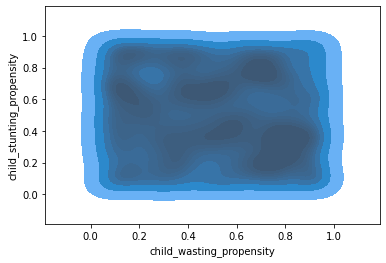

In [25]:
sns.kdeplot(
    data=cgf, x="child_wasting_propensity", y="child_stunting_propensity", 
    palette="crest", fill=True, levels=10,
    #cbar=True
)

# 1.4. Z-score correlations

NOTE: z-scores are not actually used in our simulation. I wanted to test the difference between correlation in wasting and stunting propensities with the correlation of wasting and stunting z-scores as a methods check confirmation. Notably, the wasting z-scores used for this methods check do not reflect the wasting exposure distributions used in the simulation for the 1 month to two year age groups -- keep this in mind!!

In [26]:
haz = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/stunting_age_disaggregated.csv')
haz = haz.loc[haz.year_id==2020]
haz['xpoints'] = haz.xpoints-10
haz['age_start'] = np.where(haz.age_group_id==2, 0,
                           np.where(haz.age_group_id==3, 6/365,
                                   np.where(haz.age_group_id==388, 28/365,
                                           np.where(haz.age_group_id==389, 0.5,
                                                   np.where(haz.age_group_id==238, 1, 2)))))
haz['age_end'] = np.where(haz.age_group_id==2, 6/365,
                           np.where(haz.age_group_id==3, 28/365,
                                   np.where(haz.age_group_id==388, 0.5,
                                           np.where(haz.age_group_id==389, 1,
                                                   np.where(haz.age_group_id==238, 2, 5)))))
haz.head()

,xpoints,pdf.points,cdf.points,max.flag,location_id,age_group_id,year_id,sex_id,location_name,sd.val,mean.val,index,age_start,age_end
900000,-7.000000,0.000000,0.000000e+00,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900001,-6.997199,0.000176,2.457863e-07,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900002,-6.994399,0.000176,7.386230e-07,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900003,-6.991598,0.000177,1.233911e-06,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438
900004,-6.988798,0.000178,1.730539e-06,0,179,2,2020,3,Ethiopia,1.812285,-0.458712,181,0.0,0.016438


Text(0, 0.5, 'WHZ')

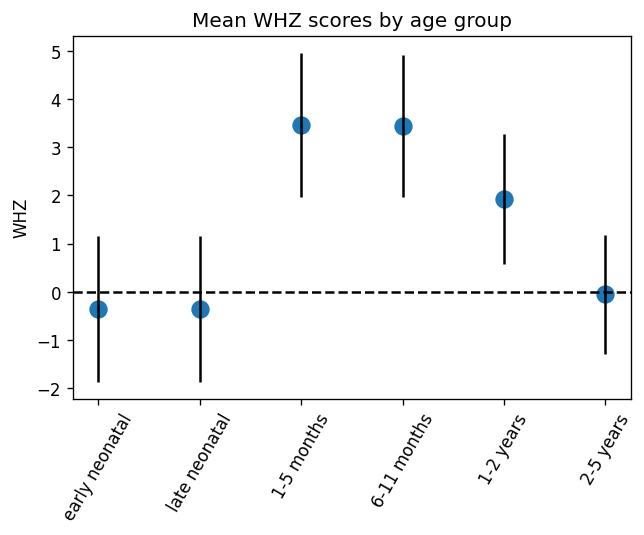

In [27]:
whz = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/wasting_age_disaggregated.csv')
whz = whz.loc[whz.year_id==2020]
whz['xpoints'] = whz['xpoints'] - 10
whz['age_start'] = np.where(whz.age_group_id==2, 0,
                           np.where(whz.age_group_id==3, 6/365,
                                   np.where(whz.age_group_id==388, 28/365,
                                           np.where(whz.age_group_id==389, 0.5,
                                                   np.where(whz.age_group_id==238, 1, 2)))))
whz['age_end'] = np.where(whz.age_group_id==2, 6/365,
                           np.where(whz.age_group_id==3, 28/365,
                                   np.where(whz.age_group_id==388, 0.5,
                                           np.where(whz.age_group_id==389, 1,
                                                   np.where(whz.age_group_id==238, 2, 5)))))
whz.head()


p = whz.loc[whz['cdf.points']==0]
plt.figure(dpi=120)
plt.scatter([0,1,2,3,4,5], p['mean.val'], s=100)
plt.axhline(y=0, linestyle='dashed', c='black')
plt.xticks([0,1,2,3,4,5], 
           ['early neonatal','late neonatal','1-5 months','6-11 months','1-2 years','2-5 years'],
           rotation=60)
plt.bar([0,1,2,3,4,5], p['mean.val'], yerr=p['sd.val'], width=0)
plt.title('Mean WHZ scores by age group')
plt.ylabel('WHZ')

In [28]:
whz.loc[whz.xpoints.round(6)==-3.003601]

,xpoints,pdf.points,cdf.points,max.flag,location_id,age_group_id,year_id,sex_id,location_name,sd.val,mean.val,index,age_start,age_end
901427,-3.003601,0.049060,0.037756,0,179,2,2020,3,Ethiopia,1.512047,-0.362003,181,0.000000,0.016438
906427,-3.003601,0.048508,0.037291,0,179,3,2020,3,Ethiopia,1.511862,-0.352693,182,0.016438,0.076712
911427,-3.003601,0.000338,0.000211,0,179,388,2020,3,Ethiopia,1.495528,3.466660,183,0.076712,0.500000
916427,-3.003601,0.000313,0.000192,0,179,389,2020,3,Ethiopia,1.472346,3.445092,184,0.500000,1.000000
921427,-3.003601,0.001541,0.000954,0,179,238,2020,3,Ethiopia,1.349788,1.920354,185,1.000000,2.000000
926427,-3.003601,0.019037,0.011900,0,179,34,2020,3,Ethiopia,1.239511,-0.049978,186,2.000000,5.000000


## NOTE: WHZ values from this dataframe are inconsistent with the artifact values of SAM exposure 

Ideally we should find WHZ/HAZ score data that is more consistent with the exposure data? Could this be a result of the fitting/squeezing performed in the GBD modeling when the ensemble distribution shape is then adjusted to fit with the exposure category envelopes?

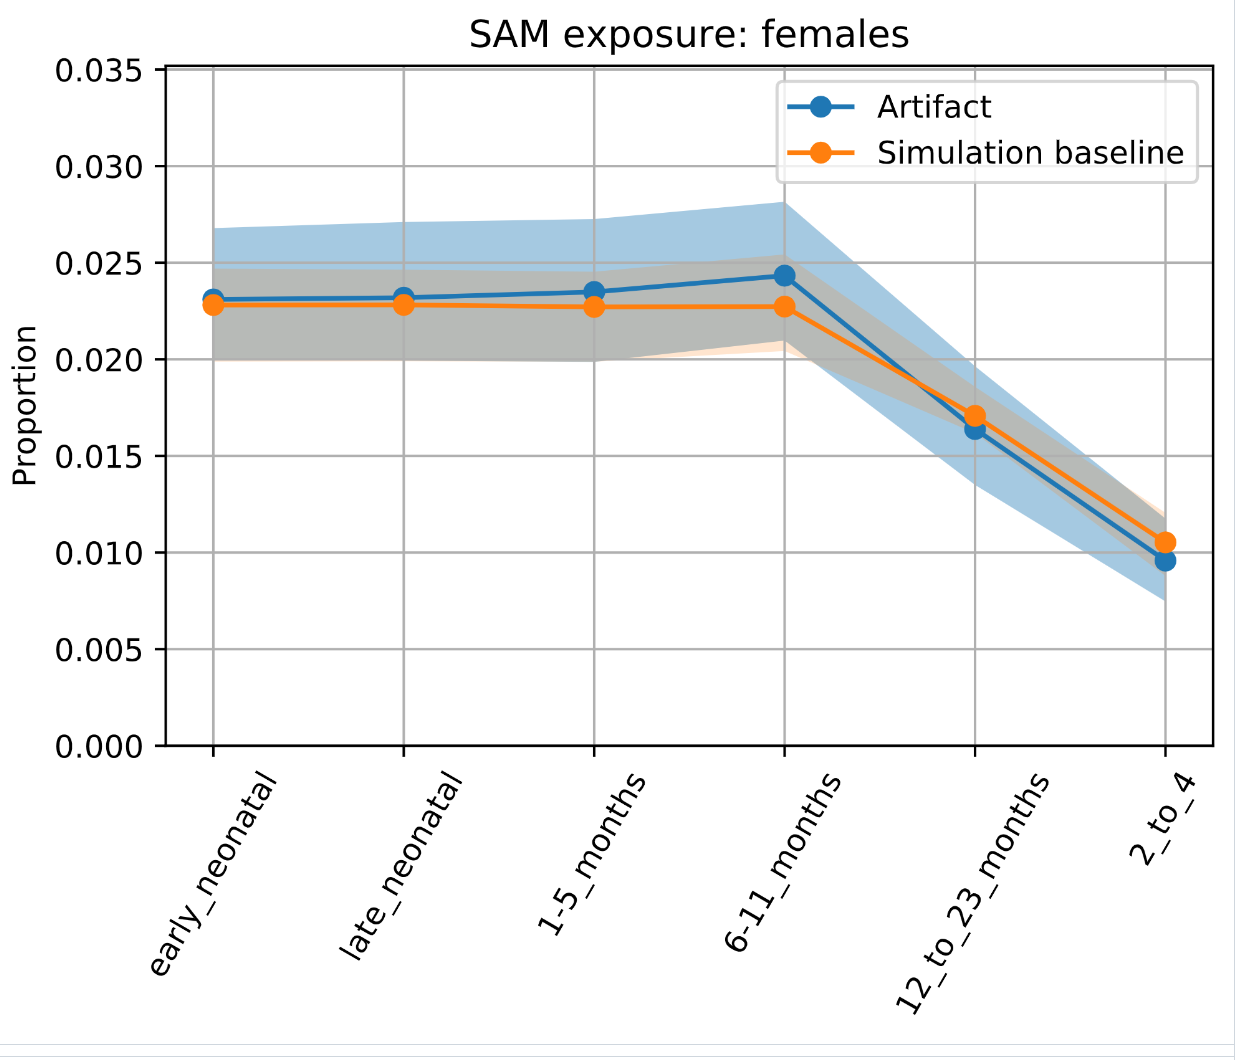

In [29]:
# test if this other dataframe also has this same issue
whz_raked = pd.read_csv('/snfs1/Project/simulation_science/ciff_malnutrition/Data/cgf_data/whz_scores_age_raked.csv')
whz_raked['age_start'] = np.where(whz_raked.age_group_id==4, 0, 1)
whz_raked['age_end'] = np.where(whz_raked.age_group_id==4, 1, 5)
whz_raked.head()

,xpoints,pdf_points,cdf_points,age_group_id,age_start,age_end,location_name,sex_id,year_id
0,-7.000000,0.000000e+00,0.000000e+00,4,0,1,Ethiopia,3,2019
1,-7.000000,0.000000e+00,0.000000e+00,5,1,5,Ethiopia,3,2019
2,-6.997199,7.897610e-08,1.105887e-10,4,0,1,Ethiopia,3,2019
3,-6.997199,6.563434e-06,9.190646e-09,5,1,5,Ethiopia,3,2019
4,-6.994399,7.970347e-08,3.327845e-10,4,0,1,Ethiopia,3,2019


In [30]:
whz_raked.loc[whz_raked.cdf_points.round(3)==0.500]

,xpoints,pdf_points,cdf_points,age_group_id,age_start,age_end,location_name,sex_id,year_id
5247,0.345869,0.273792,0.499956,5,1,5,Ethiopia,3,2019
7472,3.462893,0.286598,0.500077,4,0,1,Ethiopia,3,2019


In [31]:
pd.options.mode.chained_assignment = None  # default='warn'
cgf['whz'] = np.nan
cgf['haz'] = np.nan
for i in cgf.index:
    cgf['whz'][i] = (whz.loc[whz.age_start <= cgf.age[i]]
                   .loc[whz.age_end > cgf.age[i]]
                   .loc[whz['cdf.points'] <= cgf.child_wasting_propensity[i], 'xpoints'].tail(1).values[0])
    cgf['haz'][i] = (haz.loc[haz.age_start <= cgf.age[i]]
                   .loc[haz.age_end > cgf.age[i]]
                   .loc[haz['cdf.points'] <= cgf.child_stunting_propensity[i], 'xpoints'].tail(1).values[0])
cgf.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity,whz,haz
0,2.761284,Male,moderate_acute_malnutrition,cat2,0.287023,True,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.066625,-1.872174,-2.241848
1,2.863263,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.323165,-0.575515,4.403881
2,3.291584,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.802019,0.939588,-1.208442
3,4.900417,Female,susceptible_to_child_wasting,cat4,0.643399,False,False,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.663774,0.443889,-0.533507
4,4.285787,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211179,0.069147,0.011893,0.707781,0.600913,0.250650,-4.518704


In [32]:
cgf.loc[cgf.age>0.5].groupby(['child_wasting']).describe()['whz']

,count,mean,std,min,25%,50%,75%,max
child_wasting,,,,,,,,
mild_child_wasting,1888.0,-0.279850,1.308077,-1.732146,-1.239248,-0.886377,0.805161,2.911182
moderate_acute_malnutrition,685.0,-1.165444,1.360562,-2.983997,-2.219444,-1.835767,-0.023805,1.804961
severe_acute_malnutrition,123.0,-2.632697,1.452633,-5.619324,-3.622525,-3.152030,-1.333067,0.236647
susceptible_to_child_wasting,6210.0,1.389001,1.566279,-0.676335,0.127425,1.026405,2.309062,7.000000


In [33]:
cgf.groupby(['risk_factor.child_stunting_exposure']).describe()['haz']

,count,mean,std,min,25%,50%,75%,max
risk_factor.child_stunting_exposure,,,,,,,,
cat1,1571.0,-2.932421,1.346938,-6.815163,-3.740148,-3.157632,-2.363673,1.026405
cat2,1875.0,-1.349445,1.358850,-2.785157,-2.317463,-1.947790,-0.327666,2.079416
cat3,2083.0,-0.045042,1.517275,-1.723745,-1.303661,-0.830366,1.114623,3.093219
cat4,4471.0,2.696511,2.539362,-4.781956,0.428486,2.390278,4.415083,7.000000


In [34]:
def plot_whz_haz_kde(age_start,age_end):
    plt.figure(dpi=120)
    sns.kdeplot(data=cgf.loc[(cgf.age>age_start) & (cgf.age<age_end)], 
                x="whz", y="haz", 
                palette="crest", fill=True, levels=100)
    plt.axvline(x=-3, linestyle='dashed', c='tab:orange')
    plt.axvline(x=-2, linestyle='dashed', c='tab:orange')
    plt.axvline(x=-1, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-3, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-2, linestyle='dashed', c='tab:orange')
    plt.axhline(y=-1, linestyle='dashed', c='tab:orange')
    plt.xlabel('WHZ')
    plt.ylabel('HAZ')
    plt.title(f'WHZ and HAZ: {age_start} to {age_end} years')
    plt.ylim(-7.5,7.5)
    plt.xlim(-7.5,7.5)

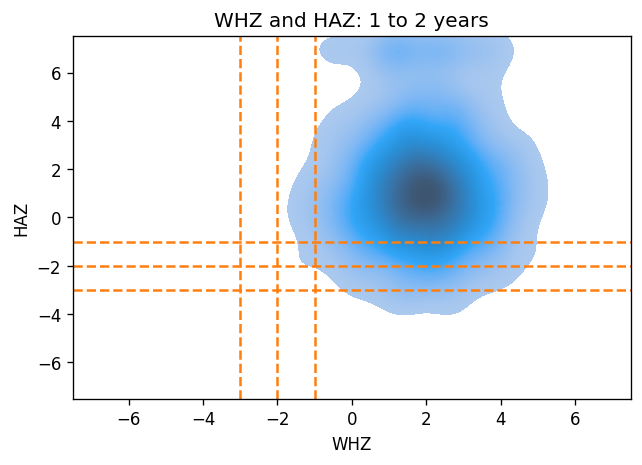

In [35]:
plot_whz_haz_kde(1,2)

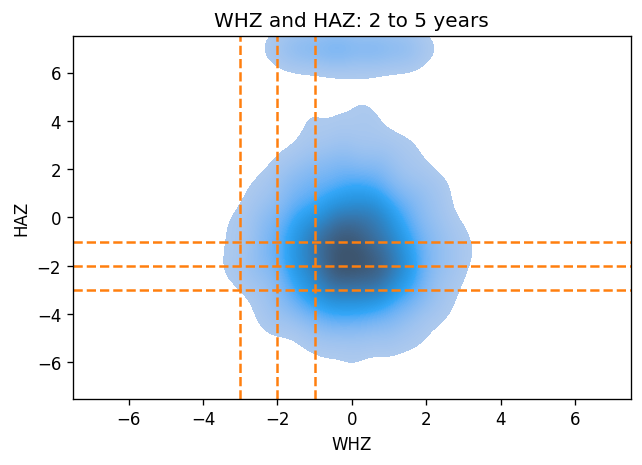

In [36]:
plot_whz_haz_kde(2,5)

# 2.0 Run simulation for 4 months 

NOTE: x-factor is currently set to 1.3

In [48]:
# set simulation run time to four months
# set x-factor to 1.3

sim.run()

# this took about an hour

2021-10-11 11:47:38.433 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 00:00:00
2021-10-11 11:47:49.490 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 12:00:00
2021-10-11 11:47:59.492 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 00:00:00
2021-10-11 11:48:09.541 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 12:00:00
2021-10-11 11:48:19.632 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 00:00:00
2021-10-11 11:48:29.617 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-03 12:00:00
2021-10-11 11:48:39.665 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 00:00:00
2021-10-11 11:48:49.573 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-04 12:00:00
2021-10-11 11:48:59.641 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 00:00:00
2021-10-11 11:49:09.573 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-05 12:00:00
2021-10-11 11:49:19.453 | DEBUG    | vivarium.framework.engi

2021-10-11 12:02:04.328 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-14 00:00:00
2021-10-11 12:02:14.038 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-14 12:00:00
2021-10-11 12:02:23.945 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-15 00:00:00
2021-10-11 12:02:33.781 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-15 12:00:00
2021-10-11 12:02:43.737 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-16 00:00:00
2021-10-11 12:02:53.521 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-16 12:00:00
2021-10-11 12:03:03.227 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-17 00:00:00
2021-10-11 12:03:12.966 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-17 12:00:00
2021-10-11 12:03:22.769 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-18 00:00:00
2021-10-11 12:03:32.723 | DEBUG    | vivarium.framework.engine:step:142 - 2022-02-18 12:00:00
2021-10-11 12:03:42.107 | DEBUG    | vivarium.framework.engi

2021-10-11 12:16:34.491 | DEBUG    | vivarium.framework.engine:step:142 - 2022-03-30 00:00:00
2021-10-11 12:16:44.643 | DEBUG    | vivarium.framework.engine:step:142 - 2022-03-30 12:00:00
2021-10-11 12:16:54.747 | DEBUG    | vivarium.framework.engine:step:142 - 2022-03-31 00:00:00
2021-10-11 12:17:04.808 | DEBUG    | vivarium.framework.engine:step:142 - 2022-03-31 12:00:00
2021-10-11 12:17:14.752 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-01 00:00:00
2021-10-11 12:17:24.910 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-01 12:00:00
2021-10-11 12:17:34.669 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-02 00:00:00
2021-10-11 12:17:44.569 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-02 12:00:00
2021-10-11 12:17:54.415 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-03 00:00:00
2021-10-11 12:18:04.342 | DEBUG    | vivarium.framework.engine:step:142 - 2022-04-03 12:00:00
2021-10-11 12:18:13.998 | DEBUG    | vivarium.framework.engi

240

In [49]:
pop4 = sim.get_population()

In [50]:
cgf4 = pd.concat([pop4.loc[:, ['age', 'sex', 'child_wasting']], 
           sim.get_value('child_stunting.exposure')(pop4.index),
           sim.get_value('child_stunting.propensity')(pop4.index)], axis=1)
cgf4

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity
0,3.089826,Male,mild_child_wasting,cat2,0.287023
1,3.191805,Male,susceptible_to_child_wasting,cat4,0.934954
2,3.620126,Female,susceptible_to_child_wasting,cat3,0.510537
4,1.125832,Male,moderate_acute_malnutrition,cat1,0.010056
...,...,...,...,...,...
10693,0.001834,Male,susceptible_to_child_wasting,cat4,0.323800
10694,0.001581,Female,susceptible_to_child_wasting,cat4,0.277594
10695,0.000246,Female,moderate_acute_malnutrition,cat4,0.356288
10696,0.001283,Female,susceptible_to_child_wasting,cat4,0.779140


# 2.1. Odds of stunting by wasting at four months

In [51]:
cgf4['wasted'] = np.where(cgf4.child_wasting.str.contains('acute_malnutrition'), True, False)
cgf4['stunted'] = np.where(cgf4['risk_factor.child_stunting_exposure'].isin(['cat1','cat2']), True, False)
cgf4.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted
0,3.089826,Male,mild_child_wasting,cat2,0.287023,False,True
1,3.191805,Male,susceptible_to_child_wasting,cat4,0.934954,False,False
2,3.620126,Female,susceptible_to_child_wasting,cat3,0.510537,False,False
4,1.125832,Male,moderate_acute_malnutrition,cat1,0.010056,True,True
5,4.614330,Female,susceptible_to_child_wasting,cat1,0.021513,False,True


In [65]:
calculate_OR_of_stunting_among_wasted(cgf4, 28/365, 0.5)

0.7841945288753799

In [66]:
calculate_OR_of_stunting_among_wasted(cgf4, 0.5, 1)

0.8189447125932426

In [67]:
calculate_OR_of_stunting_among_wasted(cgf4, 1, 2)

1.138571174963861

In [68]:
calculate_OR_of_stunting_among_wasted(cgf4, 2, 5)

0.9758370681030112

In [69]:
calculate_OR_of_stunting_among_wasted(cgf4, 28/365, 5)

0.9217891633337655

In [70]:
calculate_OR_of_stunting_among_wasted(cgf4, 0.5, 5)

0.9728462552657813

# 2.2. Wasting and stunting propensity correlation at four months

In [71]:
cgf4['age_group'] = np.where(cgf4.age<6/365,'early_neonatal',
                           np.where(cgf4.age<28/365,'post_neonatal',
                                   np.where(cgf4.age<0.5,'1_to_5_months',
                                           np.where(cgf4.age<1, '6_to_11_months',
                                                   np.where(cgf4.age<2,'1_to_2_years','2_to_5_years')))))
cgf4.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group
0,3.089826,Male,mild_child_wasting,cat2,0.287023,False,True,2_to_5_years
1,3.191805,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years
2,3.620126,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years
4,1.125832,Male,moderate_acute_malnutrition,cat1,0.010056,True,True,1_to_2_years
5,4.614330,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years


In [72]:
pcts4 = pd.crosstab(index=cgf4['age_group'], columns=cgf4['child_wasting'], normalize='index').reset_index()#.drop(columns='child_wasting')
pcts4

child_wasting,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,1_to_2_years,0.216601,0.079568,0.020629,0.683202
1,1_to_5_months,0.188119,0.101210,0.034103,0.676568
2,2_to_5_years,0.211604,0.069181,0.014885,0.704330
3,6_to_11_months,0.212621,0.081553,0.022330,0.683495
4,early_neonatal,0.244898,0.040816,0.040816,0.673469
5,post_neonatal,0.268657,0.067164,0.059701,0.604478


In [73]:
cgf4 = cgf4.merge(pcts4, on='age_group')
cgf4

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting
0,3.089826,Male,mild_child_wasting,cat2,0.287023,False,True,2_to_5_years,0.211604,0.069181,0.014885,0.704330
1,3.191805,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211604,0.069181,0.014885,0.704330
2,3.620126,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211604,0.069181,0.014885,0.704330
3,4.614330,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211604,0.069181,0.014885,0.704330
...,...,...,...,...,...,...,...,...,...,...,...,...
10066,0.018519,Male,mild_child_wasting,cat4,0.478132,False,False,post_neonatal,0.268657,0.067164,0.059701,0.604478
10067,0.019079,Female,susceptible_to_child_wasting,cat4,0.775234,False,False,post_neonatal,0.268657,0.067164,0.059701,0.604478
10068,0.017853,Female,susceptible_to_child_wasting,cat4,0.313135,False,False,post_neonatal,0.268657,0.067164,0.059701,0.604478
10069,0.016739,Male,susceptible_to_child_wasting,cat4,0.905816,False,False,post_neonatal,0.268657,0.067164,0.059701,0.604478


In [74]:
# for now, apply a dummy propensity based on child wasting exposure category
import random

# apply propensities
cgf4['child_wasting_propensity'] = np.nan
for i in cgf4.index:
    if cgf4.child_wasting[i]=='severe_acute_malnutrition':
        cgf4['child_wasting_propensity'][i] = random.uniform(0,cgf4['severe_acute_malnutrition'][i])
    elif cgf4.child_wasting[i]=='moderate_acute_malnutrition':
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i], 
                                                            cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i])
    elif cgf4.child_wasting[i]=='mild_child_wasting':
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i], 
                                                            cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i]+cgf4['mild_child_wasting'][i])
    else: 
        cgf4['child_wasting_propensity'][i] = random.uniform(cgf4['severe_acute_malnutrition'][i]+cgf4['moderate_acute_malnutrition'][i]+cgf4['mild_child_wasting'][i], 
                                                            1)
cgf4.head()

,age,sex,child_wasting,risk_factor.child_stunting_exposure,child_stunting_propensity,wasted,stunted,age_group,mild_child_wasting,moderate_acute_malnutrition,severe_acute_malnutrition,susceptible_to_child_wasting,child_wasting_propensity
0,3.089826,Male,mild_child_wasting,cat2,0.287023,False,True,2_to_5_years,0.211604,0.069181,0.014885,0.70433,0.119575
1,3.191805,Male,susceptible_to_child_wasting,cat4,0.934954,False,False,2_to_5_years,0.211604,0.069181,0.014885,0.70433,0.741477
2,3.620126,Female,susceptible_to_child_wasting,cat3,0.510537,False,False,2_to_5_years,0.211604,0.069181,0.014885,0.70433,0.734792
3,4.614330,Female,susceptible_to_child_wasting,cat1,0.021513,False,True,2_to_5_years,0.211604,0.069181,0.014885,0.70433,0.413480
4,4.582710,Male,susceptible_to_child_wasting,cat4,0.617460,False,False,2_to_5_years,0.211604,0.069181,0.014885,0.70433,0.900939


Text(0.5, 1.0, 'Child growth failure propensities at four months: All ages')

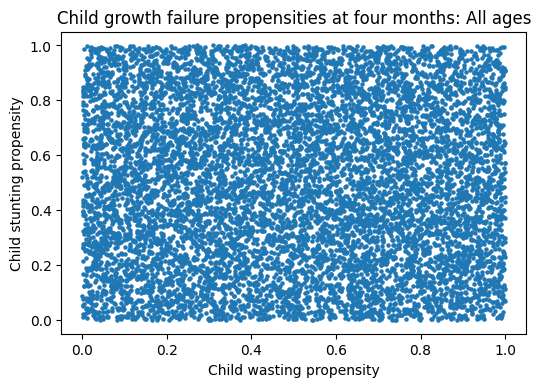

In [75]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.scatter(cgf4.child_wasting_propensity, cgf4.child_stunting_propensity, s=5)
plt.xlabel('Child wasting propensity')
plt.ylabel('Child stunting propensity')
plt.title('Child growth failure propensities at four months: All ages')

Text(0.5, 1.0, 'Child Wasting and Stunting Propensity correlation: all ages\nAt four months of run time')

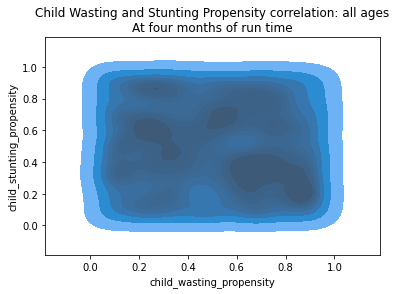

In [78]:
sns.kdeplot(
    data=cgf4, x="child_wasting_propensity", y="child_stunting_propensity", 
    palette="crest", fill=True, levels=10,
    #cbar=True
)
plt.title('Child Wasting and Stunting Propensity correlation: all ages\nAt four months of run time')